In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


In [2]:
df = pd.read_csv(r"C:\Users\dece2\OneDrive\Desktop\Data_Analysis_projects\SuperStore\train.csv")

In [3]:
#filling Missed Value
df['Postal Code'].fillna(0, inplace=True)
df['Postal Code'] = df['Postal Code'].astype(int)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
if (df.duplicated().sum() > 0):
    print('dublicate exists')
else:
    print('dublicate not exists')

dublicate not exists


C:\Users\dece2\AppData\Local\Temp\ipykernel_6388\1340342768.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(0, inplace=True)


Customer Analysis

Repeat Customers: Check for repeat purchases by Customer ID to identify loyal customers.

Sales by Customer Name: Aggregate sales per customer to identify top buyers.

- Repeat Customers: Check for repeat purchases by Customer ID to identify loyal customers.

In [12]:
# Group by Customer ID and count the number of orders
repeat_customers = df.groupby('Customer ID')['Order ID'].nunique().reset_index(name='Order Count')

# Filter for customers with more than 1 order
repeat_customers = repeat_customers[repeat_customers['Order Count'] > 1]

# Sort by the number of orders
repeat_customers = repeat_customers.sort_values(by='Order Count', ascending=False)

# Display top repeat customers


C:\Users\dece2\AppData\Local\Temp\ipykernel_6388\2055730936.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


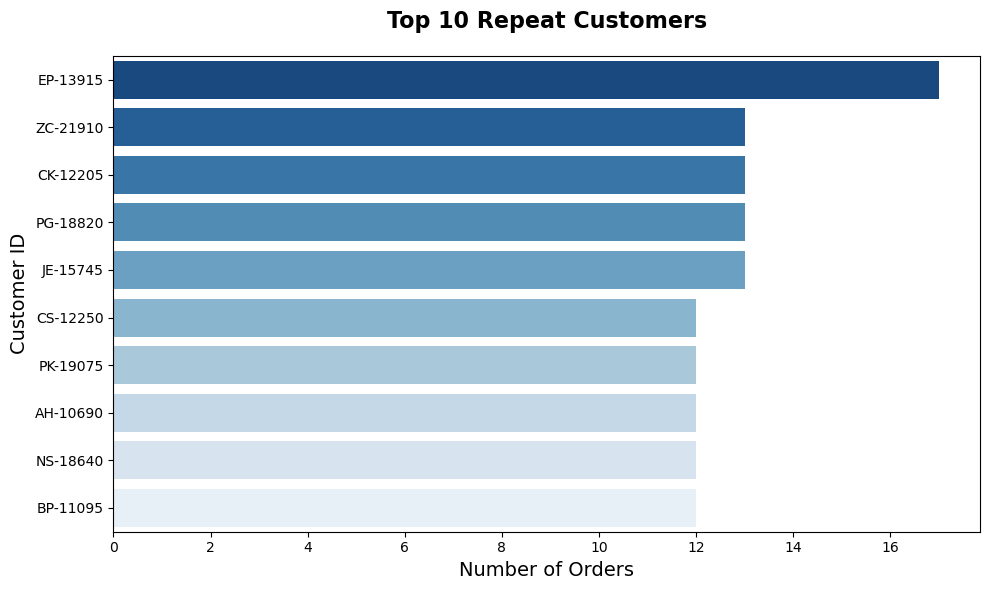

In [13]:


# Filter top repeat customers
top_repeat_customers = repeat_customers.head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_repeat_customers, 
    x='Order Count', 
    y='Customer ID', 
    palette='Blues_r'
)
plt.title('Top 10 Repeat Customers', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Customer ID', fontsize=14)
plt.tight_layout()
plt.show()


 Sales by Customer Name

In [6]:
# Aggregate sales by Customer Name
sales_by_customer = df.groupby('Customer Name')['Sales'].sum().reset_index()

# Sort by sales in descending order
sales_by_customer = sales_by_customer.sort_values(by='Sales', ascending=False)



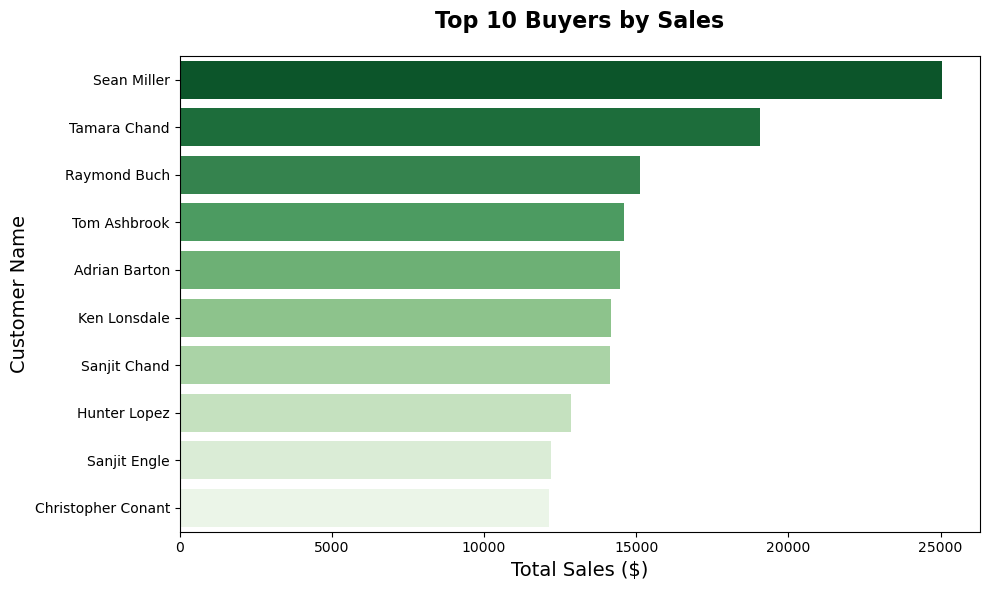

In [7]:
# Filter top buyers
top_buyers = sales_by_customer.head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_buyers, 
    x='Sales', 
    y='Customer Name', 
    hue='Customer Name',
    palette='Greens_r'
)
plt.title('Top 10 Buyers by Sales', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Sales ($)', fontsize=14)
plt.ylabel('Customer Name', fontsize=14)
plt.tight_layout()
plt.show()


Combining Insights into a Single Analysis

In [8]:
# Aggregate both order count and sales
customer_analysis = df.groupby(['Customer Name', 'Customer ID']).agg(
    Orders=('Order ID', 'nunique'),
    Total_Sales=('Sales', 'sum')
).reset_index()

# Add a column for repeat status
customer_analysis['Repeat'] = customer_analysis['Orders'] > 1

# Sort by total sales to identify top buyers
customer_analysis = customer_analysis.sort_values(by='Total_Sales', ascending=False)

# Display top customers


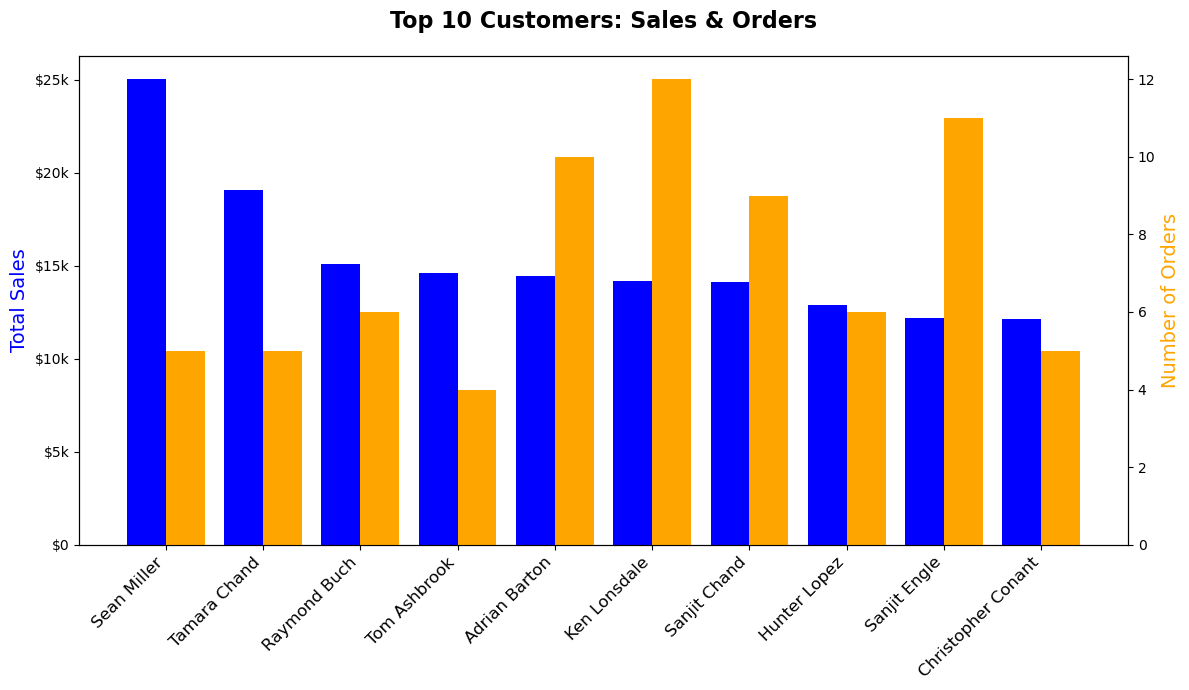

In [9]:


# Filter top combined insights
top_customers = customer_analysis.head(10)

fig, ax1 = plt.subplots(figsize=(12, 7))

# Bar chart for Total Sales
bar_width = 0.4
x_positions = range(len(top_customers['Customer Name']))
ax1.bar(
    x=[pos - bar_width / 2 for pos in x_positions],
    height=top_customers['Total_Sales'],
    width=bar_width,
    color='blue',
    label='Total Sales'
)

# Secondary y-axis for Orders
ax2 = ax1.twinx()
ax2.bar(
    x=[pos + bar_width / 2 for pos in x_positions],
    height=top_customers['Orders'],
    width=bar_width,
    color='orange',
    label='Number of Orders'
)

# Format y-axes
def currency_formatter(x, _):
    if x >= 1000:
        formatted = f"${x/1000:.1f}".rstrip("0").rstrip(".") + "k"
    else:
        formatted = f"${int(x)}"
    return formatted

ax1.yaxis.set_major_formatter(FuncFormatter(currency_formatter))
ax1.set_ylabel('Total Sales', fontsize=14, color='blue')
ax2.set_ylabel('Number of Orders', fontsize=14, color='orange')

# Customize x-axis
ax1.set_xticks(x_positions)
ax1.set_xticklabels(top_customers['Customer Name'], rotation=45, ha='right', fontsize=12)

# Title and legend
plt.title('Top 10 Customers: Sales & Orders', fontsize=16, fontweight='bold', pad=20)
fig.tight_layout()

# Show the plot
plt.show()


Explanation of Visualizations

1- Repeat Customers Bar Chart: Helps highlight customers who make the most repeat purchases.

2- Top Buyers Bar Chart: Identifies customers contributing the highest sales.

3- Combined Insights Chart: Offers a comprehensive view of both sales and order count to determine customer loyalty and value.